# Training the Model

In [1]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

In [2]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

In [3]:
# load wind turbine data from csv file
powerdata = np.genfromtxt('powerproduction.csv', delimiter=',', skip_header=1)

In [4]:
# mask all 0 value records from the dataset to remove outliers
row_mask = (powerdata != 0).all(axis=1)
# store in new array
filteredData = powerdata[row_mask,:]

In [5]:
# Create a training data frame with x and y values.
train = pd.DataFrame()
train['Speed'] = filteredData[:,0]
train['Power'] = filteredData[:,1]
train

,Speed,Power
0,0.325,4.331
1,0.400,5.186
2,0.450,3.826
3,0.501,1.048
4,0.526,5.553
...,...,...
446,24.249,103.700
447,24.299,93.694
448,24.349,93.078
449,24.374,98.223


In [6]:
# Create a neural network with two hidden layers and one output layer.
model = kr.models.Sequential()
# first hidden layer with 3 neurons and sigmoid activation
model.add(kr.layers.Dense(3, input_shape=(1,), activation="sigmoid", kernel_initializer='random_normal', bias_initializer='random_normal'))
# second hidden layer with 3 neurons and sigmoid activation
model.add(kr.layers.Dense(3, input_shape=(3,), activation="sigmoid", kernel_initializer='random_normal', bias_initializer='random_normal'))
# output layer with one neuron and linear activation
model.add(kr.layers.Dense(1, input_shape=(3,), activation="linear", kernel_initializer='random_normal', bias_initializer='random_normal'))
# build nuural network
model.compile('adam', loss='mean_squared_error')

In [7]:
# Train the neural network using the training data.
model.fit(train['Speed'], train['Power'], epochs=5000)

Epoch 1/5000
15/15 [==============================] - 0s 1ms/step - loss: 4469.8994
Epoch 2/5000
15/15 [==============================] - 0s 1ms/step - loss: 4465.8838
Epoch 3/5000
15/15 [==============================] - 0s 1ms/step - loss: 4461.6362
Epoch 4/5000
15/15 [==============================] - 0s 1ms/step - loss: 4457.3623
Epoch 5/5000
15/15 [==============================] - 0s 1ms/step - loss: 4452.8086
Epoch 6/5000
15/15 [==============================] - 0s 998us/step - loss: 4447.9565
Epoch 7/5000
15/15 [==============================] - 0s 1ms/step - loss: 4442.4941
Epoch 8/5000
15/15 [==============================] - 0s 1ms/step - loss: 4436.7622
Epoch 9/5000
15/15 [==============================] - 0s 1ms/step - loss: 4430.7056
Epoch 10/5000
15/15 [==============================] - 0s 1ms/step - loss: 4424.4932
Epoch 11/5000
15/15 [==============================] - 0s 1ms/step - loss: 4418.0029
Epoch 12/5000
15/15 [==============================] - 0s 1ms/step - los

15/15 [==============================] - 0s 1000us/step - loss: 3871.8057
Epoch 97/5000
15/15 [==============================] - 0s 1ms/step - loss: 3865.9297
Epoch 98/5000
15/15 [==============================] - 0s 933us/step - loss: 3860.3909
Epoch 99/5000
15/15 [==============================] - 0s 933us/step - loss: 3854.8784
Epoch 100/5000
15/15 [==============================] - 0s 866us/step - loss: 3849.5322
Epoch 101/5000
15/15 [==============================] - 0s 1ms/step - loss: 3844.0054
Epoch 102/5000
15/15 [==============================] - 0s 933us/step - loss: 3838.5852
Epoch 103/5000
15/15 [==============================] - 0s 933us/step - loss: 3833.1750
Epoch 104/5000
15/15 [==============================] - 0s 933us/step - loss: 3827.7261
Epoch 105/5000
15/15 [==============================] - 0s 867us/step - loss: 3822.3579
Epoch 106/5000
15/15 [==============================] - 0s 933us/step - loss: 3816.8367
Epoch 107/5000
15/15 [==============================]

15/15 [==============================] - 0s 933us/step - loss: 3398.2424
Epoch 190/5000
15/15 [==============================] - 0s 1ms/step - loss: 3393.5632
Epoch 191/5000
15/15 [==============================] - 0s 866us/step - loss: 3388.9021
Epoch 192/5000
15/15 [==============================] - 0s 933us/step - loss: 3384.0884
Epoch 193/5000
15/15 [==============================] - 0s 933us/step - loss: 3379.2090
Epoch 194/5000
15/15 [==============================] - 0s 866us/step - loss: 3374.4438
Epoch 195/5000
15/15 [==============================] - 0s 933us/step - loss: 3369.8425
Epoch 196/5000
15/15 [==============================] - 0s 933us/step - loss: 3365.3337
Epoch 197/5000
15/15 [==============================] - 0s 866us/step - loss: 3360.5391
Epoch 198/5000
15/15 [==============================] - 0s 866us/step - loss: 3355.9890
Epoch 199/5000
15/15 [==============================] - 0s 933us/step - loss: 3351.2849
Epoch 200/5000
15/15 [===========================

15/15 [==============================] - 0s 933us/step - loss: 2990.0125
Epoch 283/5000
15/15 [==============================] - 0s 1000us/step - loss: 2985.7869
Epoch 284/5000
15/15 [==============================] - 0s 1000us/step - loss: 2981.3567
Epoch 285/5000
15/15 [==============================] - 0s 933us/step - loss: 2977.1060
Epoch 286/5000
15/15 [==============================] - 0s 933us/step - loss: 2972.7556
Epoch 287/5000
15/15 [==============================] - 0s 933us/step - loss: 2968.2444
Epoch 288/5000
15/15 [==============================] - 0s 933us/step - loss: 2963.8586
Epoch 289/5000
15/15 [==============================] - 0s 933us/step - loss: 2959.5925
Epoch 290/5000
15/15 [==============================] - 0s 867us/step - loss: 2955.4534
Epoch 291/5000
15/15 [==============================] - 0s 933us/step - loss: 2951.1555
Epoch 292/5000
15/15 [==============================] - 0s 933us/step - loss: 2946.6636
Epoch 293/5000
15/15 [=======================

Epoch 375/5000
15/15 [==============================] - 0s 1000us/step - loss: 2580.5911
Epoch 376/5000
15/15 [==============================] - 0s 1000us/step - loss: 2576.2166
Epoch 377/5000
15/15 [==============================] - 0s 933us/step - loss: 2571.8879
Epoch 378/5000
15/15 [==============================] - 0s 933us/step - loss: 2567.6497
Epoch 379/5000
15/15 [==============================] - 0s 933us/step - loss: 2563.4214
Epoch 380/5000
15/15 [==============================] - 0s 933us/step - loss: 2559.2041
Epoch 381/5000
15/15 [==============================] - 0s 933us/step - loss: 2555.0144
Epoch 382/5000
15/15 [==============================] - 0s 867us/step - loss: 2550.7505
Epoch 383/5000
15/15 [==============================] - 0s 933us/step - loss: 2546.4404
Epoch 384/5000
15/15 [==============================] - 0s 866us/step - loss: 2542.2957
Epoch 385/5000
15/15 [==============================] - 0s 866us/step - loss: 2537.9937
Epoch 386/5000
15/15 [========

15/15 [==============================] - 0s 1000us/step - loss: 2208.4250
Epoch 468/5000
15/15 [==============================] - 0s 1000us/step - loss: 2204.5220
Epoch 469/5000
15/15 [==============================] - 0s 933us/step - loss: 2200.6638
Epoch 470/5000
15/15 [==============================] - 0s 933us/step - loss: 2196.7722
Epoch 471/5000
15/15 [==============================] - 0s 933us/step - loss: 2193.1030
Epoch 472/5000
15/15 [==============================] - 0s 1ms/step - loss: 2189.3459
Epoch 473/5000
15/15 [==============================] - 0s 867us/step - loss: 2185.7249
Epoch 474/5000
15/15 [==============================] - 0s 866us/step - loss: 2182.0564
Epoch 475/5000
15/15 [==============================] - 0s 867us/step - loss: 2178.3242
Epoch 476/5000
15/15 [==============================] - 0s 933us/step - loss: 2174.4685
Epoch 477/5000
15/15 [==============================] - 0s 800us/step - loss: 2170.6365
Epoch 478/5000
15/15 [=========================

15/15 [==============================] - 0s 999us/step - loss: 1874.9794
Epoch 561/5000
15/15 [==============================] - 0s 933us/step - loss: 1871.6594
Epoch 562/5000
15/15 [==============================] - 0s 866us/step - loss: 1868.1575
Epoch 563/5000
15/15 [==============================] - 0s 867us/step - loss: 1864.6960
Epoch 564/5000
15/15 [==============================] - 0s 800us/step - loss: 1861.2352
Epoch 565/5000
15/15 [==============================] - 0s 800us/step - loss: 1857.9341
Epoch 566/5000
15/15 [==============================] - 0s 1000us/step - loss: 1854.7452
Epoch 567/5000
15/15 [==============================] - 0s 933us/step - loss: 1851.2570
Epoch 568/5000
15/15 [==============================] - 0s 933us/step - loss: 1847.7913
Epoch 569/5000
15/15 [==============================] - 0s 933us/step - loss: 1844.5635
Epoch 570/5000
15/15 [==============================] - 0s 1000us/step - loss: 1841.3654
Epoch 571/5000
15/15 [=======================

15/15 [==============================] - 0s 933us/step - loss: 1578.6569
Epoch 654/5000
15/15 [==============================] - 0s 1ms/step - loss: 1575.5597
Epoch 655/5000
15/15 [==============================] - 0s 800us/step - loss: 1572.4305
Epoch 656/5000
15/15 [==============================] - 0s 866us/step - loss: 1569.3831
Epoch 657/5000
15/15 [==============================] - 0s 1ms/step - loss: 1566.4061
Epoch 658/5000
15/15 [==============================] - 0s 1ms/step - loss: 1563.4254
Epoch 659/5000
15/15 [==============================] - 0s 867us/step - loss: 1560.3801
Epoch 660/5000
15/15 [==============================] - 0s 933us/step - loss: 1557.5643
Epoch 661/5000
15/15 [==============================] - 0s 933us/step - loss: 1554.5311
Epoch 662/5000
15/15 [==============================] - 0s 933us/step - loss: 1551.5028
Epoch 663/5000
15/15 [==============================] - 0s 866us/step - loss: 1548.4150
Epoch 664/5000
15/15 [==============================]

15/15 [==============================] - 0s 1ms/step - loss: 1313.2935
Epoch 747/5000
15/15 [==============================] - 0s 933us/step - loss: 1310.6068
Epoch 748/5000
15/15 [==============================] - 0s 933us/step - loss: 1307.9390
Epoch 749/5000
15/15 [==============================] - 0s 867us/step - loss: 1305.3452
Epoch 750/5000
15/15 [==============================] - 0s 933us/step - loss: 1302.7074
Epoch 751/5000
15/15 [==============================] - 0s 1ms/step - loss: 1300.0992
Epoch 752/5000
15/15 [==============================] - 0s 933us/step - loss: 1297.6744
Epoch 753/5000
15/15 [==============================] - 0s 933us/step - loss: 1294.9740
Epoch 754/5000
15/15 [==============================] - 0s 867us/step - loss: 1291.8826
Epoch 755/5000
15/15 [==============================] - 0s 933us/step - loss: 1289.4335
Epoch 756/5000
15/15 [==============================] - 0s 866us/step - loss: 1286.7253
Epoch 757/5000
15/15 [=============================

15/15 [==============================] - 0s 1000us/step - loss: 1083.9076
Epoch 839/5000
15/15 [==============================] - 0s 1ms/step - loss: 1081.5278
Epoch 840/5000
15/15 [==============================] - 0s 1000us/step - loss: 1079.1969
Epoch 841/5000
15/15 [==============================] - 0s 933us/step - loss: 1076.9277
Epoch 842/5000
15/15 [==============================] - 0s 933us/step - loss: 1074.6935
Epoch 843/5000
15/15 [==============================] - 0s 866us/step - loss: 1072.3605
Epoch 844/5000
15/15 [==============================] - 0s 933us/step - loss: 1070.0715
Epoch 845/5000
15/15 [==============================] - 0s 933us/step - loss: 1067.7147
Epoch 846/5000
15/15 [==============================] - 0s 933us/step - loss: 1065.3925
Epoch 847/5000
15/15 [==============================] - 0s 866us/step - loss: 1063.1680
Epoch 848/5000
15/15 [==============================] - 0s 866us/step - loss: 1060.7405
Epoch 849/5000
15/15 [=========================

15/15 [==============================] - 0s 1ms/step - loss: 881.3300
Epoch 932/5000
15/15 [==============================] - 0s 1ms/step - loss: 879.3287
Epoch 933/5000
15/15 [==============================] - 0s 1000us/step - loss: 877.3732
Epoch 934/5000
15/15 [==============================] - 0s 933us/step - loss: 875.3047
Epoch 935/5000
15/15 [==============================] - 0s 932us/step - loss: 873.2745
Epoch 936/5000
15/15 [==============================] - 0s 933us/step - loss: 871.3395
Epoch 937/5000
15/15 [==============================] - 0s 867us/step - loss: 869.2031
Epoch 938/5000
15/15 [==============================] - 0s 933us/step - loss: 867.1511
Epoch 939/5000
15/15 [==============================] - 0s 933us/step - loss: 865.2097
Epoch 940/5000
15/15 [==============================] - 0s 933us/step - loss: 863.2660
Epoch 941/5000
15/15 [==============================] - 0s 933us/step - loss: 861.3155
Epoch 942/5000
15/15 [==============================] - 0s 86

15/15 [==============================] - 0s 933us/step - loss: 706.9136
Epoch 1025/5000
15/15 [==============================] - 0s 1ms/step - loss: 705.4706
Epoch 1026/5000
15/15 [==============================] - 0s 1000us/step - loss: 703.6482
Epoch 1027/5000
15/15 [==============================] - 0s 933us/step - loss: 701.8192
Epoch 1028/5000
15/15 [==============================] - 0s 867us/step - loss: 700.0294
Epoch 1029/5000
15/15 [==============================] - 0s 1000us/step - loss: 698.1597
Epoch 1030/5000
15/15 [==============================] - 0s 933us/step - loss: 696.5020
Epoch 1031/5000
15/15 [==============================] - 0s 933us/step - loss: 694.8239
Epoch 1032/5000
15/15 [==============================] - 0s 933us/step - loss: 693.1493
Epoch 1033/5000
15/15 [==============================] - 0s 866us/step - loss: 691.4074
Epoch 1034/5000
15/15 [==============================] - 0s 866us/step - loss: 689.6757
Epoch 1035/5000
15/15 [=========================

15/15 [==============================] - 0s 933us/step - loss: 561.2157
Epoch 1117/5000
15/15 [==============================] - 0s 1000us/step - loss: 559.6898
Epoch 1118/5000
15/15 [==============================] - 0s 867us/step - loss: 558.2796
Epoch 1119/5000
15/15 [==============================] - 0s 867us/step - loss: 556.7393
Epoch 1120/5000
15/15 [==============================] - 0s 867us/step - loss: 555.3347
Epoch 1121/5000
15/15 [==============================] - 0s 867us/step - loss: 554.0150
Epoch 1122/5000
15/15 [==============================] - 0s 933us/step - loss: 552.4820
Epoch 1123/5000
15/15 [==============================] - 0s 933us/step - loss: 551.0051
Epoch 1124/5000
15/15 [==============================] - 0s 933us/step - loss: 549.5977
Epoch 1125/5000
15/15 [==============================] - 0s 1000us/step - loss: 548.1053
Epoch 1126/5000
15/15 [==============================] - 0s 933us/step - loss: 546.8729
Epoch 1127/5000
15/15 [=======================

15/15 [==============================] - 0s 1000us/step - loss: 439.2609
Epoch 1209/5000
15/15 [==============================] - 0s 1000us/step - loss: 438.1519
Epoch 1210/5000
15/15 [==============================] - 0s 866us/step - loss: 437.4120
Epoch 1211/5000
15/15 [==============================] - 0s 933us/step - loss: 435.9770
Epoch 1212/5000
15/15 [==============================] - 0s 1ms/step - loss: 434.6931
Epoch 1213/5000
15/15 [==============================] - 0s 933us/step - loss: 433.4452
Epoch 1214/5000
15/15 [==============================] - 0s 933us/step - loss: 432.3616
Epoch 1215/5000
15/15 [==============================] - 0s 933us/step - loss: 431.1221
Epoch 1216/5000
15/15 [==============================] - 0s 1000us/step - loss: 429.9763
Epoch 1217/5000
15/15 [==============================] - 0s 1000us/step - loss: 428.7976
Epoch 1218/5000
15/15 [==============================] - 0s 933us/step - loss: 427.6116
Epoch 1219/5000
15/15 [=======================

15/15 [==============================] - 0s 933us/step - loss: 342.2077
Epoch 1301/5000
15/15 [==============================] - 0s 1000us/step - loss: 340.8418
Epoch 1302/5000
15/15 [==============================] - 0s 933us/step - loss: 339.8947
Epoch 1303/5000
15/15 [==============================] - 0s 933us/step - loss: 338.9424
Epoch 1304/5000
15/15 [==============================] - 0s 933us/step - loss: 338.0338
Epoch 1305/5000
15/15 [==============================] - 0s 932us/step - loss: 337.0546
Epoch 1306/5000
15/15 [==============================] - 0s 866us/step - loss: 335.9746
Epoch 1307/5000
15/15 [==============================] - 0s 933us/step - loss: 335.1171
Epoch 1308/5000
15/15 [==============================] - 0s 866us/step - loss: 334.0389
Epoch 1309/5000
15/15 [==============================] - 0s 933us/step - loss: 333.6070
Epoch 1310/5000
15/15 [==============================] - 0s 933us/step - loss: 332.3506
Epoch 1311/5000
15/15 [========================

Epoch 1393/5000
15/15 [==============================] - 0s 1000us/step - loss: 263.8026
Epoch 1394/5000
15/15 [==============================] - 0s 933us/step - loss: 263.1273
Epoch 1395/5000
15/15 [==============================] - ETA: 0s - loss: 235.449 - 0s 1ms/step - loss: 262.3419
Epoch 1396/5000
15/15 [==============================] - 0s 933us/step - loss: 261.5685
Epoch 1397/5000
15/15 [==============================] - 0s 934us/step - loss: 260.8087
Epoch 1398/5000
15/15 [==============================] - 0s 933us/step - loss: 260.0658
Epoch 1399/5000
15/15 [==============================] - 0s 866us/step - loss: 259.3452
Epoch 1400/5000
15/15 [==============================] - 0s 933us/step - loss: 259.3412
Epoch 1401/5000
15/15 [==============================] - 0s 866us/step - loss: 258.0455
Epoch 1402/5000
15/15 [==============================] - 0s 864us/step - loss: 257.2763
Epoch 1403/5000
15/15 [==============================] - 0s 867us/step - loss: 256.5165
Epoch 1

15/15 [==============================] - 0s 1ms/step - loss: 206.0936
Epoch 1486/5000
15/15 [==============================] - 0s 933us/step - loss: 205.4811
Epoch 1487/5000
15/15 [==============================] - 0s 933us/step - loss: 204.8266
Epoch 1488/5000
15/15 [==============================] - 0s 1000us/step - loss: 204.2543
Epoch 1489/5000
15/15 [==============================] - 0s 933us/step - loss: 203.7166
Epoch 1490/5000
15/15 [==============================] - 0s 866us/step - loss: 203.2296
Epoch 1491/5000
15/15 [==============================] - 0s 867us/step - loss: 202.7403
Epoch 1492/5000
15/15 [==============================] - 0s 867us/step - loss: 202.1569
Epoch 1493/5000
15/15 [==============================] - 0s 800us/step - loss: 201.7482
Epoch 1494/5000
15/15 [==============================] - 0s 800us/step - loss: 201.1273
Epoch 1495/5000
15/15 [==============================] - 0s 800us/step - loss: 200.6163
Epoch 1496/5000
15/15 [==========================

15/15 [==============================] - 0s 867us/step - loss: 163.5426
Epoch 1578/5000
15/15 [==============================] - 0s 1ms/step - loss: 163.1609
Epoch 1579/5000
15/15 [==============================] - 0s 1000us/step - loss: 162.7444
Epoch 1580/5000
15/15 [==============================] - 0s 933us/step - loss: 162.4119
Epoch 1581/5000
15/15 [==============================] - 0s 1ms/step - loss: 162.0328
Epoch 1582/5000
15/15 [==============================] - 0s 933us/step - loss: 161.6816
Epoch 1583/5000
15/15 [==============================] - 0s 933us/step - loss: 161.2316
Epoch 1584/5000
15/15 [==============================] - 0s 1000us/step - loss: 160.8680
Epoch 1585/5000
15/15 [==============================] - 0s 866us/step - loss: 160.4791
Epoch 1586/5000
15/15 [==============================] - 0s 933us/step - loss: 160.1399
Epoch 1587/5000
15/15 [==============================] - 0s 933us/step - loss: 159.7435
Epoch 1588/5000
15/15 [===========================

15/15 [==============================] - 0s 933us/step - loss: 132.7130
Epoch 1671/5000
15/15 [==============================] - 0s 1000us/step - loss: 132.5264
Epoch 1672/5000
15/15 [==============================] - 0s 866us/step - loss: 132.0035
Epoch 1673/5000
15/15 [==============================] - 0s 933us/step - loss: 131.7345
Epoch 1674/5000
15/15 [==============================] - 0s 866us/step - loss: 131.5267
Epoch 1675/5000
15/15 [==============================] - 0s 934us/step - loss: 131.3272
Epoch 1676/5000
15/15 [==============================] - 0s 867us/step - loss: 130.9021
Epoch 1677/5000
15/15 [==============================] - 0s 867us/step - loss: 130.8040
Epoch 1678/5000
15/15 [==============================] - 0s 934us/step - loss: 130.3527
Epoch 1679/5000
15/15 [==============================] - 0s 933us/step - loss: 130.0591
Epoch 1680/5000
15/15 [==============================] - 0s 1000us/step - loss: 129.7779
Epoch 1681/5000
15/15 [=======================

Epoch 1763/5000
15/15 [==============================] - 0s 933us/step - loss: 108.7721
Epoch 1764/5000
15/15 [==============================] - 0s 866us/step - loss: 108.6018
Epoch 1765/5000
15/15 [==============================] - 0s 866us/step - loss: 108.3719
Epoch 1766/5000
15/15 [==============================] - 0s 933us/step - loss: 108.0216
Epoch 1767/5000
15/15 [==============================] - 0s 866us/step - loss: 107.8017
Epoch 1768/5000
15/15 [==============================] - 0s 866us/step - loss: 107.6284
Epoch 1769/5000
15/15 [==============================] - 0s 1000us/step - loss: 107.3721
Epoch 1770/5000
15/15 [==============================] - 0s 933us/step - loss: 107.1467
Epoch 1771/5000
15/15 [==============================] - 0s 933us/step - loss: 106.9487
Epoch 1772/5000
15/15 [==============================] - 0s 1000us/step - loss: 106.6702
Epoch 1773/5000
15/15 [==============================] - 0s 933us/step - loss: 106.4297
Epoch 1774/5000
15/15 [=======

15/15 [==============================] - 0s 1000us/step - loss: 89.3912
Epoch 1857/5000
15/15 [==============================] - 0s 1000us/step - loss: 88.8977
Epoch 1858/5000
15/15 [==============================] - 0s 1000us/step - loss: 88.5261
Epoch 1859/5000
15/15 [==============================] - 0s 867us/step - loss: 88.4576
Epoch 1860/5000
15/15 [==============================] - 0s 933us/step - loss: 88.1975
Epoch 1861/5000
15/15 [==============================] - 0s 933us/step - loss: 88.0157
Epoch 1862/5000
15/15 [==============================] - 0s 933us/step - loss: 87.8346
Epoch 1863/5000
15/15 [==============================] - 0s 933us/step - loss: 87.6178
Epoch 1864/5000
15/15 [==============================] - 0s 866us/step - loss: 87.4140
Epoch 1865/5000
15/15 [==============================] - 0s 867us/step - loss: 87.2881
Epoch 1866/5000
15/15 [==============================] - 0s 867us/step - loss: 87.2599
Epoch 1867/5000
15/15 [==============================] -

15/15 [==============================] - 0s 1000us/step - loss: 72.4756
Epoch 1951/5000
15/15 [==============================] - 0s 1000us/step - loss: 72.3193
Epoch 1952/5000
15/15 [==============================] - 0s 933us/step - loss: 72.2147
Epoch 1953/5000
15/15 [==============================] - 0s 933us/step - loss: 72.2848
Epoch 1954/5000
15/15 [==============================] - 0s 866us/step - loss: 72.0416
Epoch 1955/5000
15/15 [==============================] - 0s 799us/step - loss: 71.9348
Epoch 1956/5000
15/15 [==============================] - 0s 867us/step - loss: 71.7014
Epoch 1957/5000
15/15 [==============================] - 0s 866us/step - loss: 71.4039
Epoch 1958/5000
15/15 [==============================] - 0s 933us/step - loss: 71.2926
Epoch 1959/5000
15/15 [==============================] - 0s 933us/step - loss: 71.1101
Epoch 1960/5000
15/15 [==============================] - 0s 1000us/step - loss: 70.9647
Epoch 1961/5000
15/15 [==============================] -

15/15 [==============================] - 0s 1ms/step - loss: 59.3243
Epoch 2045/5000
15/15 [==============================] - 0s 1ms/step - loss: 59.1819
Epoch 2046/5000
15/15 [==============================] - 0s 1000us/step - loss: 59.0907
Epoch 2047/5000
15/15 [==============================] - 0s 933us/step - loss: 58.9607
Epoch 2048/5000
15/15 [==============================] - 0s 1000us/step - loss: 58.8957
Epoch 2049/5000
15/15 [==============================] - 0s 933us/step - loss: 58.6968
Epoch 2050/5000
15/15 [==============================] - 0s 933us/step - loss: 58.5546
Epoch 2051/5000
15/15 [==============================] - 0s 1ms/step - loss: 58.4129
Epoch 2052/5000
15/15 [==============================] - 0s 867us/step - loss: 58.2874
Epoch 2053/5000
15/15 [==============================] - 0s 866us/step - loss: 58.1606
Epoch 2054/5000
15/15 [==============================] - 0s 800us/step - loss: 58.0355
Epoch 2055/5000
15/15 [==============================] - 0s 933

15/15 [==============================] - 0s 1ms/step - loss: 48.7697
Epoch 2140/5000
15/15 [==============================] - 0s 1ms/step - loss: 48.6892
Epoch 2141/5000
15/15 [==============================] - 0s 1ms/step - loss: 48.5561
Epoch 2142/5000
15/15 [==============================] - 0s 1ms/step - loss: 48.4810
Epoch 2143/5000
15/15 [==============================] - 0s 930us/step - loss: 48.5347
Epoch 2144/5000
15/15 [==============================] - 0s 1ms/step - loss: 48.2156
Epoch 2145/5000
15/15 [==============================] - 0s 1ms/step - loss: 48.1486
Epoch 2146/5000
15/15 [==============================] - 0s 1ms/step - loss: 48.1747
Epoch 2147/5000
15/15 [==============================] - 0s 1ms/step - loss: 47.9504
Epoch 2148/5000
15/15 [==============================] - 0s 1ms/step - loss: 47.8859
Epoch 2149/5000
15/15 [==============================] - 0s 1ms/step - loss: 47.7791
Epoch 2150/5000
15/15 [==============================] - 0s 1ms/step - loss: 47

15/15 [==============================] - 0s 1000us/step - loss: 40.6003
Epoch 2235/5000
15/15 [==============================] - 0s 1ms/step - loss: 40.5335
Epoch 2236/5000
15/15 [==============================] - 0s 1ms/step - loss: 40.4346
Epoch 2237/5000
15/15 [==============================] - 0s 1ms/step - loss: 40.3501
Epoch 2238/5000
15/15 [==============================] - 0s 1000us/step - loss: 40.2485
Epoch 2239/5000
15/15 [==============================] - 0s 1ms/step - loss: 40.2171
Epoch 2240/5000
15/15 [==============================] - 0s 933us/step - loss: 40.2746
Epoch 2241/5000
15/15 [==============================] - 0s 935us/step - loss: 40.1227
Epoch 2242/5000
15/15 [==============================] - 0s 1000us/step - loss: 40.1081
Epoch 2243/5000
15/15 [==============================] - 0s 1000us/step - loss: 39.9633
Epoch 2244/5000
15/15 [==============================] - 0s 1000us/step - loss: 39.9000
Epoch 2245/5000
15/15 [==============================] - 0s 10

15/15 [==============================] - 0s 933us/step - loss: 34.3188
Epoch 2330/5000
15/15 [==============================] - 0s 1ms/step - loss: 34.2175
Epoch 2331/5000
15/15 [==============================] - 0s 1ms/step - loss: 34.1927
Epoch 2332/5000
15/15 [==============================] - 0s 1000us/step - loss: 34.1324
Epoch 2333/5000
15/15 [==============================] - 0s 933us/step - loss: 34.1019
Epoch 2334/5000
15/15 [==============================] - 0s 933us/step - loss: 33.9889
Epoch 2335/5000
15/15 [==============================] - 0s 1000us/step - loss: 34.0979
Epoch 2336/5000
15/15 [==============================] - 0s 934us/step - loss: 33.9952
Epoch 2337/5000
15/15 [==============================] - 0s 1000us/step - loss: 34.1843
Epoch 2338/5000
15/15 [==============================] - 0s 933us/step - loss: 34.5580
Epoch 2339/5000
15/15 [==============================] - 0s 930us/step - loss: 33.5672
Epoch 2340/5000
15/15 [==============================] - 0s 

15/15 [==============================] - 0s 1ms/step - loss: 29.4200
Epoch 2424/5000
15/15 [==============================] - 0s 1ms/step - loss: 29.4120
Epoch 2425/5000
15/15 [==============================] - 0s 1ms/step - loss: 29.4084
Epoch 2426/5000
15/15 [==============================] - 0s 1000us/step - loss: 29.5548
Epoch 2427/5000
15/15 [==============================] - 0s 1ms/step - loss: 29.7687
Epoch 2428/5000
15/15 [==============================] - 0s 1000us/step - loss: 29.6048
Epoch 2429/5000
15/15 [==============================] - 0s 1000us/step - loss: 29.3613
Epoch 2430/5000
15/15 [==============================] - 0s 1000us/step - loss: 29.1908
Epoch 2431/5000
15/15 [==============================] - 0s 1000us/step - loss: 29.1202
Epoch 2432/5000
15/15 [==============================] - 0s 1000us/step - loss: 29.9111
Epoch 2433/5000
15/15 [==============================] - 0s 1000us/step - loss: 29.1610
Epoch 2434/5000
15/15 [==============================] - 0s 

15/15 [==============================] - 0s 1ms/step - loss: 25.7408
Epoch 2518/5000
15/15 [==============================] - 0s 1ms/step - loss: 25.7309
Epoch 2519/5000
15/15 [==============================] - 0s 1000us/step - loss: 25.6839
Epoch 2520/5000
15/15 [==============================] - 0s 933us/step - loss: 25.6491
Epoch 2521/5000
15/15 [==============================] - 0s 934us/step - loss: 25.6569
Epoch 2522/5000
15/15 [==============================] - 0s 866us/step - loss: 25.6790
Epoch 2523/5000
15/15 [==============================] - 0s 933us/step - loss: 25.5823
Epoch 2524/5000
15/15 [==============================] - 0s 1000us/step - loss: 25.6942
Epoch 2525/5000
15/15 [==============================] - 0s 1000us/step - loss: 25.4979
Epoch 2526/5000
15/15 [==============================] - 0s 1ms/step - loss: 25.4367
Epoch 2527/5000
15/15 [==============================] - 0s 1000us/step - loss: 25.4182
Epoch 2528/5000
15/15 [==============================] - 0s 9

15/15 [==============================] - 0s 1ms/step - loss: 22.8885
Epoch 2613/5000
15/15 [==============================] - 0s 933us/step - loss: 23.0108
Epoch 2614/5000
15/15 [==============================] - 0s 1000us/step - loss: 22.9577
Epoch 2615/5000
15/15 [==============================] - 0s 867us/step - loss: 22.8409
Epoch 2616/5000
15/15 [==============================] - 0s 1000us/step - loss: 22.8082
Epoch 2617/5000
15/15 [==============================] - 0s 1000us/step - loss: 22.7468
Epoch 2618/5000
15/15 [==============================] - 0s 1ms/step - loss: 22.7961
Epoch 2619/5000
15/15 [==============================] - 0s 933us/step - loss: 22.7458
Epoch 2620/5000
15/15 [==============================] - 0s 1ms/step - loss: 22.8576
Epoch 2621/5000
15/15 [==============================] - 0s 933us/step - loss: 22.6612
Epoch 2622/5000
15/15 [==============================] - 0s 866us/step - loss: 22.6268
Epoch 2623/5000
15/15 [==============================] - 0s 10

15/15 [==============================] - 0s 1ms/step - loss: 20.8305
Epoch 2708/5000
15/15 [==============================] - 0s 1ms/step - loss: 20.7645
Epoch 2709/5000
15/15 [==============================] - 0s 1ms/step - loss: 20.7749
Epoch 2710/5000
15/15 [==============================] - 0s 866us/step - loss: 20.7694
Epoch 2711/5000
15/15 [==============================] - 0s 1000us/step - loss: 20.7582
Epoch 2712/5000
15/15 [==============================] - 0s 1000us/step - loss: 20.7773
Epoch 2713/5000
15/15 [==============================] - 0s 1000us/step - loss: 20.8453
Epoch 2714/5000
15/15 [==============================] - 0s 1ms/step - loss: 20.7309
Epoch 2715/5000
15/15 [==============================] - 0s 997us/step - loss: 20.6463
Epoch 2716/5000
15/15 [==============================] - 0s 1ms/step - loss: 20.6544
Epoch 2717/5000
15/15 [==============================] - 0s 933us/step - loss: 20.6034
Epoch 2718/5000
15/15 [==============================] - 0s 1ms/st

15/15 [==============================] - 0s 1ms/step - loss: 19.3938
Epoch 2803/5000
15/15 [==============================] - 0s 1ms/step - loss: 19.3714
Epoch 2804/5000
15/15 [==============================] - 0s 1000us/step - loss: 19.3286
Epoch 2805/5000
15/15 [==============================] - 0s 1ms/step - loss: 19.3151
Epoch 2806/5000
15/15 [==============================] - 0s 1000us/step - loss: 19.5388
Epoch 2807/5000
15/15 [==============================] - 0s 1000us/step - loss: 19.3588
Epoch 2808/5000
15/15 [==============================] - 0s 1ms/step - loss: 19.4048
Epoch 2809/5000
15/15 [==============================] - 0s 1000us/step - loss: 19.3779
Epoch 2810/5000
15/15 [==============================] - 0s 932us/step - loss: 19.2581
Epoch 2811/5000
15/15 [==============================] - 0s 1000us/step - loss: 19.2711
Epoch 2812/5000
15/15 [==============================] - 0s 1ms/step - loss: 19.1989
Epoch 2813/5000
15/15 [==============================] - 0s 1ms/

15/15 [==============================] - 0s 2ms/step - loss: 18.5539
Epoch 2898/5000
15/15 [==============================] - 0s 2ms/step - loss: 18.4127
Epoch 2899/5000
15/15 [==============================] - 0s 1ms/step - loss: 18.4065
Epoch 2900/5000
15/15 [==============================] - 0s 1ms/step - loss: 18.3449
Epoch 2901/5000
15/15 [==============================] - 0s 1000us/step - loss: 18.3664
Epoch 2902/5000
15/15 [==============================] - 0s 1000us/step - loss: 18.3626
Epoch 2903/5000
15/15 [==============================] - 0s 1ms/step - loss: 18.3246
Epoch 2904/5000
15/15 [==============================] - 0s 1000us/step - loss: 18.5777
Epoch 2905/5000
15/15 [==============================] - 0s 1000us/step - loss: 18.3307
Epoch 2906/5000
15/15 [==============================] - 0s 1ms/step - loss: 18.3473
Epoch 2907/5000
15/15 [==============================] - 0s 1000us/step - loss: 18.3944
Epoch 2908/5000
15/15 [==============================] - 0s 1000us

15/15 [==============================] - 0s 1ms/step - loss: 17.9637
Epoch 2993/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.8890
Epoch 2994/5000
15/15 [==============================] - 0s 1ms/step - loss: 18.0024
Epoch 2995/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.8067
Epoch 2996/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.7704
Epoch 2997/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.7579
Epoch 2998/5000
15/15 [==============================] - 0s 866us/step - loss: 17.7888
Epoch 2999/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.7748
Epoch 3000/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.8098
Epoch 3001/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.7581
Epoch 3002/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.8193
Epoch 3003/5000
15/15 [==============================] - 0s 866us/step - 

15/15 [==============================] - 0s 1ms/step - loss: 17.4372
Epoch 3088/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.4003
Epoch 3089/5000
15/15 [==============================] - 0s 934us/step - loss: 17.4120
Epoch 3090/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.5142
Epoch 3091/5000
15/15 [==============================] - ETA: 0s - loss: 19.56 - 0s 999us/step - loss: 17.3984
Epoch 3092/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.5311
Epoch 3093/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.4735
Epoch 3094/5000
15/15 [==============================] - 0s 866us/step - loss: 17.4498
Epoch 3095/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.3797
Epoch 3096/5000
15/15 [==============================] - 0s 933us/step - loss: 17.3577
Epoch 3097/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.6119
Epoch 3098/5000
15/15 [==============

15/15 [==============================] - 0s 1ms/step - loss: 17.4511
Epoch 3182/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.3627
Epoch 3183/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.1509
Epoch 3184/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.2844
Epoch 3185/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.4207
Epoch 3186/5000
15/15 [==============================] - 0s 998us/step - loss: 17.1002
Epoch 3187/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.1314
Epoch 3188/5000
15/15 [==============================] - 0s 933us/step - loss: 17.1312
Epoch 3189/5000
15/15 [==============================] - 0s 934us/step - loss: 17.3589
Epoch 3190/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.1214
Epoch 3191/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.1646
Epoch 3192/5000
15/15 [==============================] - 0s 999

15/15 [==============================] - 0s 1ms/step - loss: 17.0750
Epoch 3277/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.0510
Epoch 3278/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.0811
Epoch 3279/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.1204
Epoch 3280/5000
15/15 [==============================] - 0s 997us/step - loss: 17.0243
Epoch 3281/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.1497
Epoch 3282/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.0852
Epoch 3283/5000
15/15 [==============================] - 0s 999us/step - loss: 17.0039
Epoch 3284/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.0584
Epoch 3285/5000
15/15 [==============================] - 0s 933us/step - loss: 17.0101
Epoch 3286/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.0012
Epoch 3287/5000
15/15 [==============================] - 0s 866us/

15/15 [==============================] - 0s 933us/step - loss: 16.9490
Epoch 3371/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.0204
Epoch 3372/5000
15/15 [==============================] - 0s 933us/step - loss: 17.0005
Epoch 3373/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.0378
Epoch 3374/5000
15/15 [==============================] - 0s 933us/step - loss: 17.0473
Epoch 3375/5000
15/15 [==============================] - 0s 933us/step - loss: 16.9367
Epoch 3376/5000
15/15 [==============================] - 0s 933us/step - loss: 16.9898
Epoch 3377/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.0384
Epoch 3378/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9452
Epoch 3379/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.9363
Epoch 3380/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.1253
Epoch 3381/5000
15/15 [==============================] - 0s 1000u

15/15 [==============================] - 0s 1ms/step - loss: 16.9615
Epoch 3466/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8711
Epoch 3467/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9041
Epoch 3468/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8985
Epoch 3469/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.9964
Epoch 3470/5000
15/15 [==============================] - 0s 999us/step - loss: 16.9161
Epoch 3471/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.9441
Epoch 3472/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9585
Epoch 3473/5000
15/15 [==============================] - 0s 997us/step - loss: 16.8473
Epoch 3474/5000
15/15 [==============================] - 0s 999us/step - loss: 16.8697
Epoch 3475/5000
15/15 [==============================] - 0s 933us/step - loss: 16.9133
Epoch 3476/5000
15/15 [==============================] - 0s 1ms/ste

15/15 [==============================] - 0s 1000us/step - loss: 16.8608
Epoch 3560/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.8568
Epoch 3561/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.9732
Epoch 3562/5000
15/15 [==============================] - 0s 933us/step - loss: 16.8567
Epoch 3563/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8413
Epoch 3564/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9564
Epoch 3565/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.9069
Epoch 3566/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.9094
Epoch 3567/5000
15/15 [==============================] - 0s 997us/step - loss: 16.9145
Epoch 3568/5000
15/15 [==============================] - 0s 933us/step - loss: 16.9443
Epoch 3569/5000
15/15 [==============================] - 0s 933us/step - loss: 16.9487
Epoch 3570/5000
15/15 [==============================] - 0

15/15 [==============================] - 0s 1ms/step - loss: 16.8618
Epoch 3654/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8640
Epoch 3655/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.2764
Epoch 3656/5000
15/15 [==============================] - 0s 866us/step - loss: 16.7685
Epoch 3657/5000
15/15 [==============================] - 0s 867us/step - loss: 16.9390
Epoch 3658/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.8780
Epoch 3659/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8253
Epoch 3660/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.8454
Epoch 3661/5000
15/15 [==============================] - 0s 998us/step - loss: 17.1015
Epoch 3662/5000
15/15 [==============================] - 0s 1ms/step - loss: 17.1289
Epoch 3663/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8338
Epoch 3664/5000
15/15 [==============================] - 0s 1000us/st

15/15 [==============================] - 0s 1ms/step - loss: 16.8508
Epoch 3749/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8309
Epoch 3750/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8349
Epoch 3751/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7720
Epoch 3752/5000
15/15 [==============================] - 0s 933us/step - loss: 16.8380
Epoch 3753/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8197
Epoch 3754/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.8231
Epoch 3755/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.8098
Epoch 3756/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8362
Epoch 3757/5000
15/15 [==============================] - 0s 2ms/step - loss: 16.8716
Epoch 3758/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.9073
Epoch 3759/5000
15/15 [==============================] - 0s 933us/st

Epoch 3843/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8755
Epoch 3844/5000
15/15 [==============================] - 0s 1000us/step - loss: 17.0344
Epoch 3845/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7276
Epoch 3846/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8001
Epoch 3847/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7940
Epoch 3848/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.8672
Epoch 3849/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.9537
Epoch 3850/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8503
Epoch 3851/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.8257
Epoch 3852/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7758
Epoch 3853/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7922
Epoch 3854/5000
15/15 [============================

15/15 [==============================] - 0s 1000us/step - loss: 16.7773
Epoch 3939/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7897
Epoch 3940/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7651
Epoch 3941/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.8179
Epoch 3942/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.9089
Epoch 3943/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.8011
Epoch 3944/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.7990
Epoch 3945/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7790
Epoch 3946/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7724
Epoch 3947/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.7942
Epoch 3948/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7925
Epoch 3949/5000
15/15 [==============================] - 0s

15/15 [==============================] - 0s 1ms/step - loss: 16.7661
Epoch 4034/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7901
Epoch 4035/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7633
Epoch 4036/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.8702
Epoch 4037/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8281
Epoch 4038/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8872
Epoch 4039/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7552
Epoch 4040/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7481
Epoch 4041/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7984
Epoch 4042/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7882
Epoch 4043/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8474
Epoch 4044/5000
15/15 [==============================] - 0s 1ms/step - loss: 1

15/15 [==============================] - 0s 1ms/step - loss: 16.7863
Epoch 4130/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7179
Epoch 4131/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8221
Epoch 4132/5000
15/15 [==============================] - 0s 997us/step - loss: 16.7719
Epoch 4133/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.7815
Epoch 4134/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.8081
Epoch 4135/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7197
Epoch 4136/5000
15/15 [==============================] - 0s 998us/step - loss: 16.7429
Epoch 4137/5000
15/15 [==============================] - 0s 933us/step - loss: 16.8280
Epoch 4138/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8263
Epoch 4139/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7884
Epoch 4140/5000
15/15 [==============================] - 0s 1ms/ste

15/15 [==============================] - 0s 1ms/step - loss: 16.8429
Epoch 4226/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8311
Epoch 4227/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9894
Epoch 4228/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8005
Epoch 4229/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8326
Epoch 4230/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7491
Epoch 4231/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7655
Epoch 4232/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7341
Epoch 4233/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8069
Epoch 4234/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7479
Epoch 4235/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7613
Epoch 4236/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7

15/15 [==============================] - 0s 1ms/step - loss: 16.7241
Epoch 4322/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7499
Epoch 4323/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7232
Epoch 4324/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.7057
Epoch 4325/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7409
Epoch 4326/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7184
Epoch 4327/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7999
Epoch 4328/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8363
Epoch 4329/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8854
Epoch 4330/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7099
Epoch 4331/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8457
Epoch 4332/5000
15/15 [==============================] - 0s 1ms/step - loss: 1

15/15 [==============================] - 0s 1ms/step - loss: 16.8003
Epoch 4418/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9077
Epoch 4419/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7314
Epoch 4420/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7632
Epoch 4421/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8425
Epoch 4422/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8102
Epoch 4423/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6812
Epoch 4424/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7411
Epoch 4425/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7184
Epoch 4426/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7881
Epoch 4427/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7471
Epoch 4428/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7

15/15 [==============================] - 0s 1ms/step - loss: 16.7286
Epoch 4514/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7103
Epoch 4515/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6959
Epoch 4516/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7468
Epoch 4517/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6997
Epoch 4518/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7331
Epoch 4519/5000
15/15 [==============================] - 0s 2ms/step - loss: 17.0258
Epoch 4520/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.9173
Epoch 4521/5000
15/15 [==============================] - ETA: 0s - loss: 12.06 - 0s 1ms/step - loss: 16.7040
Epoch 4522/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7139
Epoch 4523/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6985
Epoch 4524/5000
15/15 [==============================] - 

15/15 [==============================] - 0s 1000us/step - loss: 16.7080
Epoch 4610/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6864
Epoch 4611/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6787
Epoch 4612/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6865
Epoch 4613/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7044
Epoch 4614/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6918
Epoch 4615/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7577
Epoch 4616/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6922
Epoch 4617/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7095
Epoch 4618/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.8589
Epoch 4619/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7540
Epoch 4620/5000
15/15 [==============================] - 0s 1ms/step - loss: 1

Epoch 4705/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6248
Epoch 4706/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6948
Epoch 4707/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.7982
Epoch 4708/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.7211
Epoch 4709/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6650
Epoch 4710/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7003
Epoch 4711/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6941
Epoch 4712/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.6783
Epoch 4713/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.7033
Epoch 4714/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7524
Epoch 4715/5000
15/15 [==============================] - 0s 998us/step - loss: 16.6887
Epoch 4716/5000
15/15 [=============================

15/15 [==============================] - 0s 1000us/step - loss: 16.7111
Epoch 4800/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6701
Epoch 4801/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6802
Epoch 4802/5000
15/15 [==============================] - 0s 1ms/step - loss: 16.6975
Epoch 4803/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7125
Epoch 4804/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6146
Epoch 4805/5000
15/15 [==============================] - ETA: 0s - loss: 12.46 - 0s 1ms/step - loss: 16.7216
Epoch 4806/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6902
Epoch 4807/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6933
Epoch 4808/5000
15/15 [==============================] - 0s 867us/step - loss: 16.6640
Epoch 4809/5000
15/15 [==============================] - 0s 867us/step - loss: 16.7037
Epoch 4810/5000
15/15 [===================

15/15 [==============================] - 0s 1000us/step - loss: 16.7605
Epoch 4894/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7888
Epoch 4895/5000
15/15 [==============================] - 0s 933us/step - loss: 16.8336
Epoch 4896/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7519
Epoch 4897/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7311
Epoch 4898/5000
15/15 [==============================] - 0s 866us/step - loss: 16.6949
Epoch 4899/5000
15/15 [==============================] - 0s 866us/step - loss: 16.6881
Epoch 4900/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7472
Epoch 4901/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6447
Epoch 4902/5000
15/15 [==============================] - 0s 800us/step - loss: 16.6359
Epoch 4903/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6602
Epoch 4904/5000
15/15 [==============================] - 0

15/15 [==============================] - 0s 1000us/step - loss: 16.6553
Epoch 4988/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6614
Epoch 4989/5000
15/15 [==============================] - 0s 933us/step - loss: 16.9568
Epoch 4990/5000
15/15 [==============================] - 0s 866us/step - loss: 16.7769
Epoch 4991/5000
15/15 [==============================] - 0s 933us/step - loss: 16.6888
Epoch 4992/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7379
Epoch 4993/5000
15/15 [==============================] - 0s 866us/step - loss: 16.6497
Epoch 4994/5000
15/15 [==============================] - 0s 866us/step - loss: 16.6531
Epoch 4995/5000
15/15 [==============================] - 0s 867us/step - loss: 16.9500
Epoch 4996/5000
15/15 [==============================] - 0s 933us/step - loss: 16.7241
Epoch 4997/5000
15/15 [==============================] - 0s 1000us/step - loss: 16.7813
Epoch 4998/5000
15/15 [==============================] - 

In [8]:
# find number of rows in filtered data set
number_of_rows = filteredData.shape[0]

# get 100 random indices from data set
random_indices = np.random.choice(number_of_rows, size=100, replace=False)

# create 100 random samples
random_samples = filteredData[random_indices, :]

# put samples into numpy array
random_samples = np.array(random_samples)

# sort array 
sortedArr = random_samples[random_samples[:,0].argsort()]

# make test data from random samples
test = pd.DataFrame()
test['Speed'] = sortedArr[:,0]
test['Power'] = sortedArr[:,1]
test

,Speed,Power
0,0.400,5.186
1,0.551,6.498
2,0.801,7.271
3,0.926,1.996
4,1.051,2.085
...,...,...
95,22.523,97.256
96,23.123,101.654
97,23.248,104.655
98,23.549,98.066


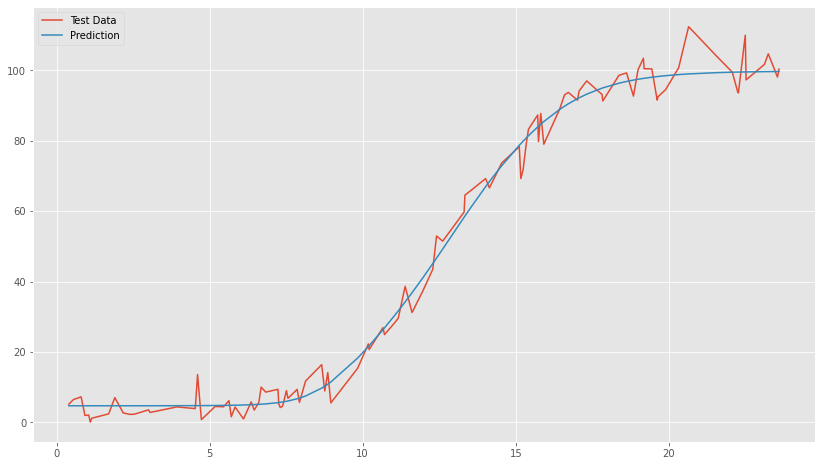

In [9]:
# plot the predictions of the speed and power values
plt.plot(test['Speed'], test['Power'], label='Test Data')
plt.plot(test['Speed'], model.predict(test['Speed']), label='Prediction')
plt.legend();